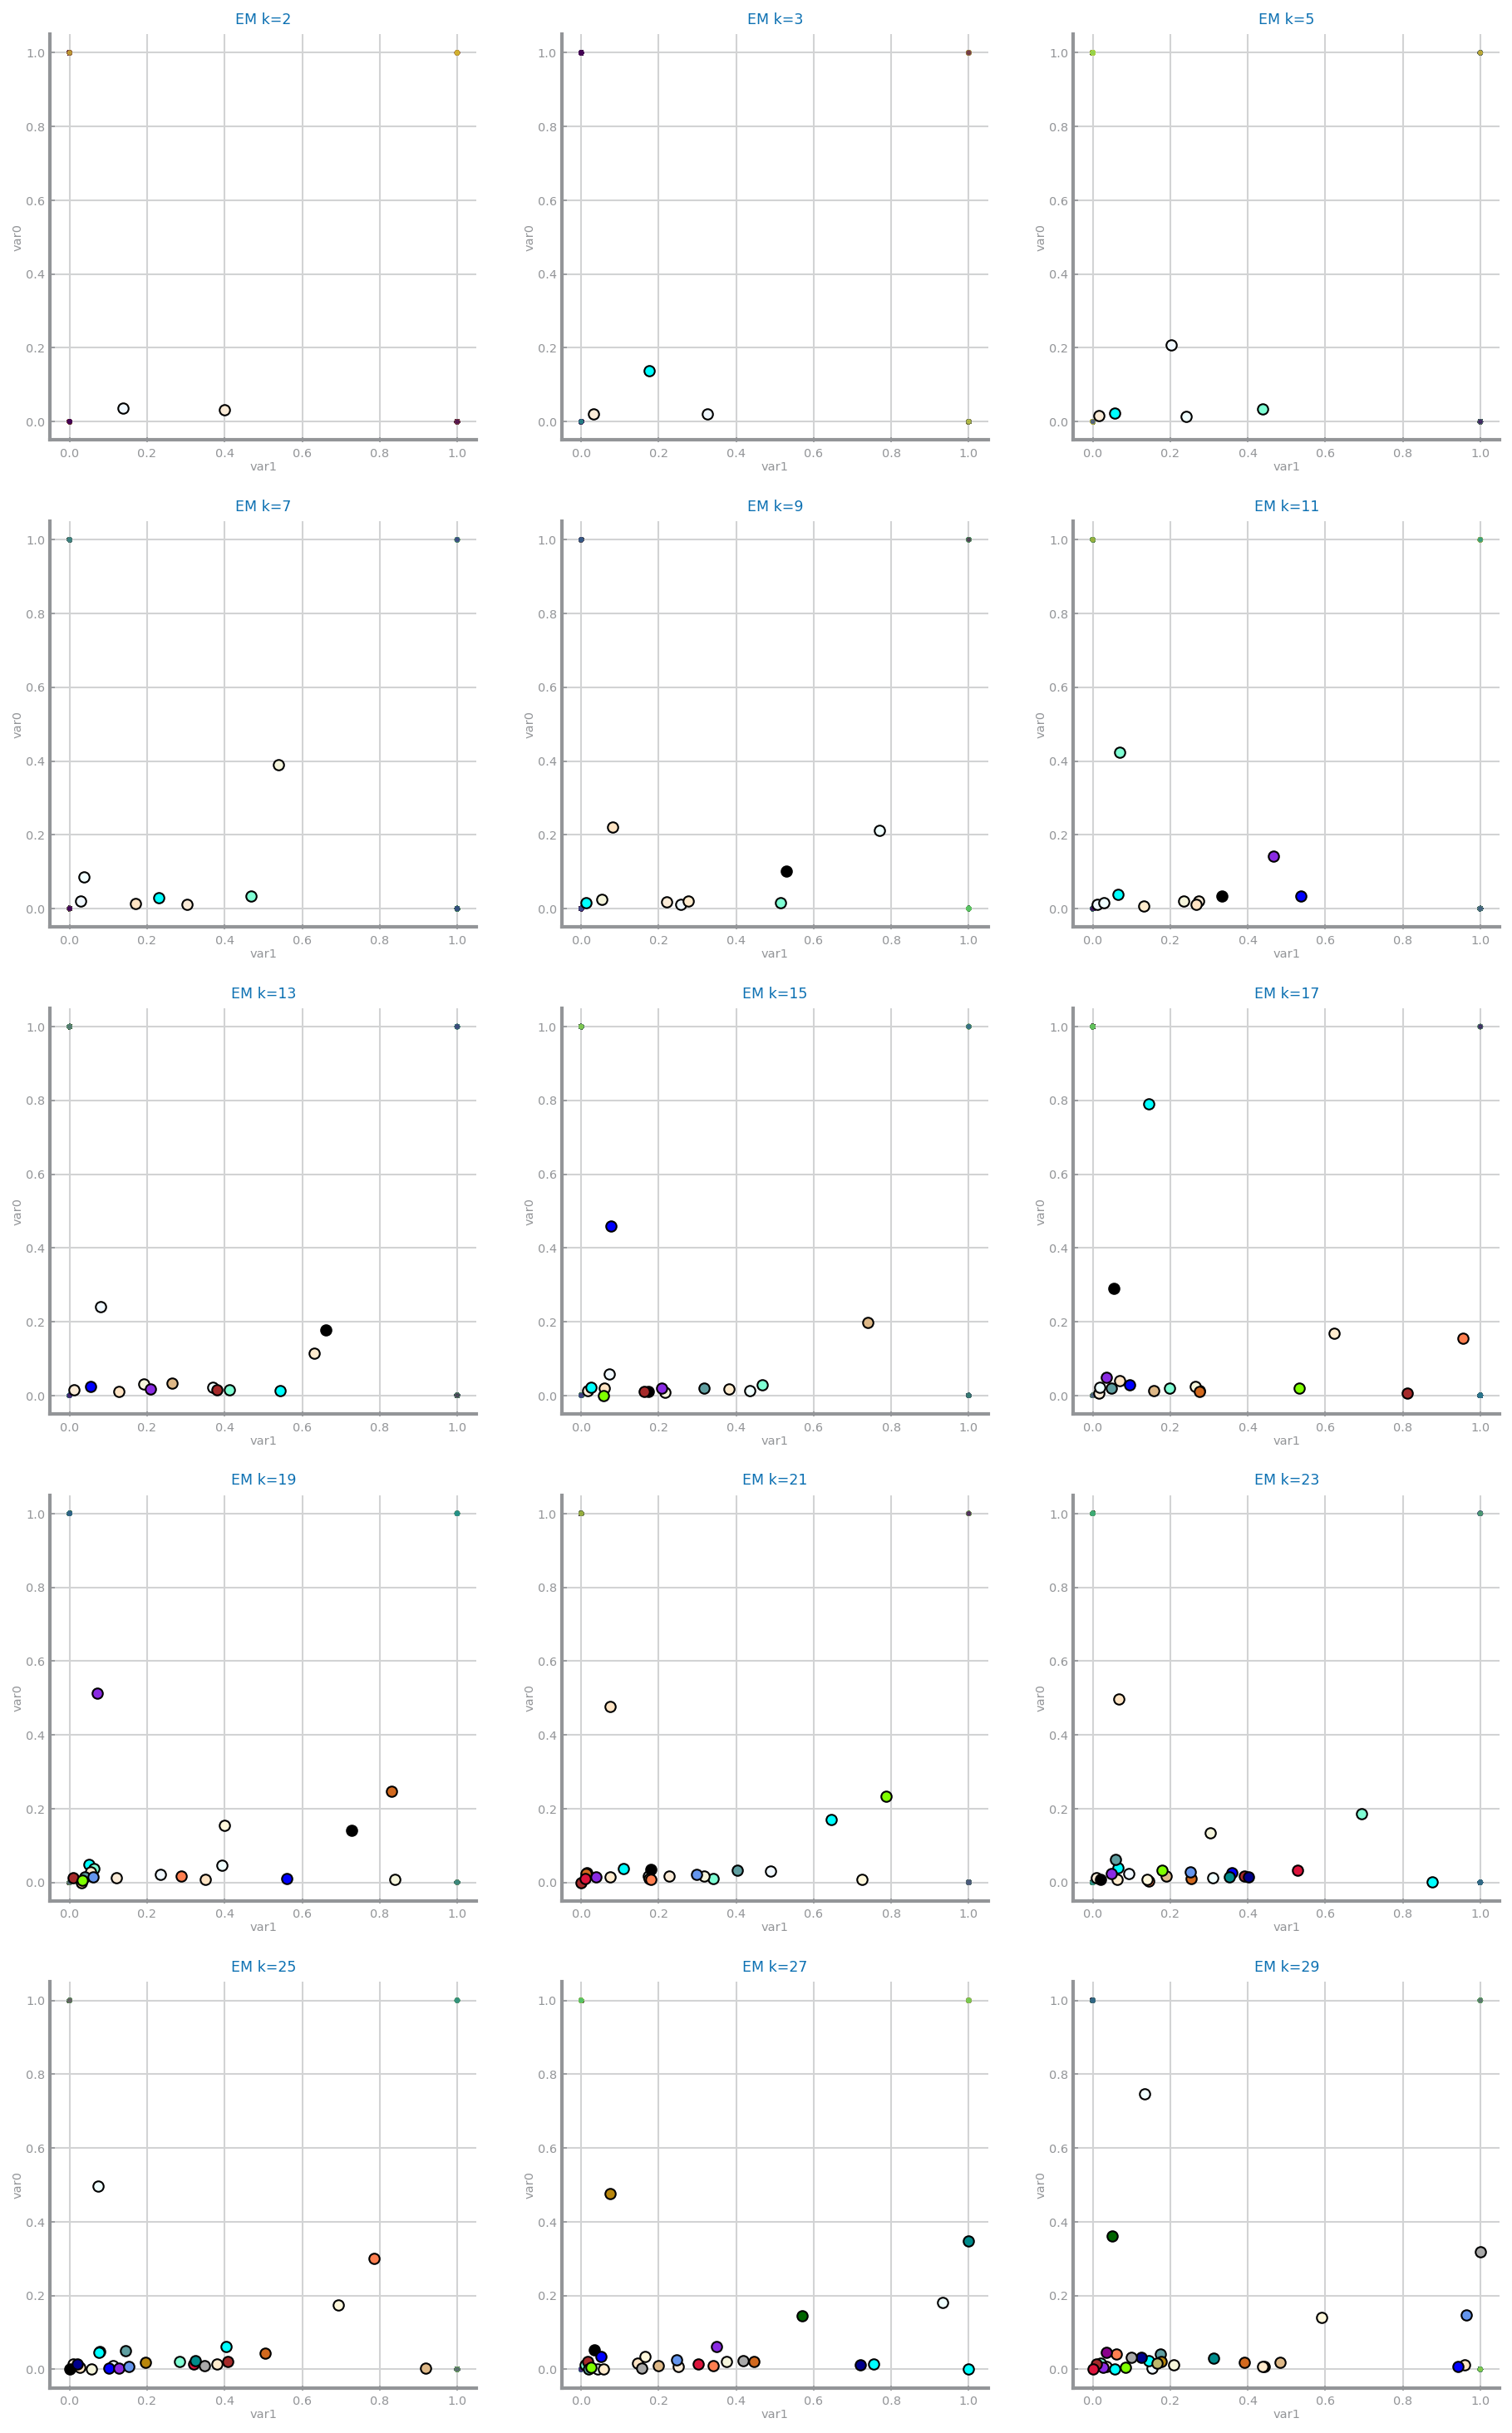

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.metrics import silhouette_score

data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
v1 = 0
v2 = 1

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
rows, cols = ds.choose_grid(len(N_CLUSTERS))
data.pop('IS_TOXIC')
from sklearn.mixture import GaussianMixture

mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

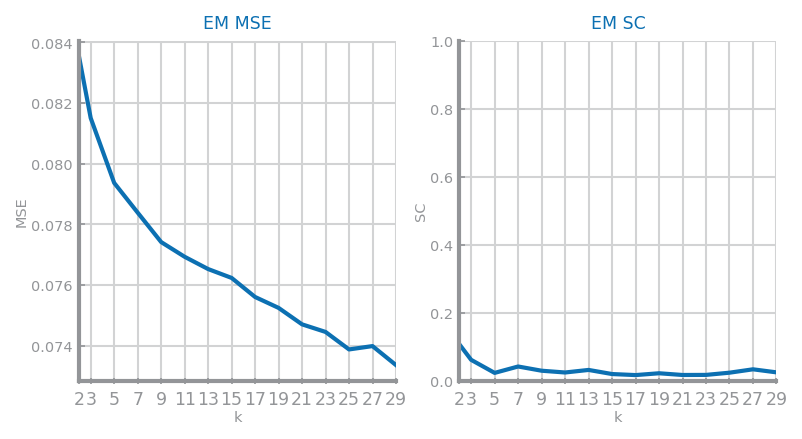

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
plt.show()

In [9]:
k = 27
data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
y=data.pop('IS_TOXIC')
estimator = GaussianMixture(n_components=k)
estimator.fit(data)
labels = estimator.predict(data)
mse.append(ds.compute_mse(data.values, labels, estimator.means_))
sc.append(silhouette_score(data, labels))

ix=0
counts = [[0,0] for val in range(k)]
for val in y:
    if val == 'positive':
        counts[labels[ix]][1]+=1
    else:
        counts[labels[ix]][0]+=1
    ix+=1
    
for ix in range(len(counts)):
    print("["+str(ix) + "]: " + str(counts[labels[ix]][1]/(counts[labels[ix]][1]+counts[labels[ix]][0])))

    perc = [0 for val in range(k)]
for ix in range(len(counts)):
    perc[ix] = counts[labels[ix]][1]/(counts[labels[ix]][1]+counts[labels[ix]][0])
    print("["+str(ix) + "]: " + str(counts[labels[ix]][1]/(counts[labels[ix]][1]+counts[labels[ix]][0])))
    
total = 0
mean = sum(perc)/len(perc)
for ix in range(len(perc)):
    if perc[ix]-mean > 0:
        total += perc[ix]-mean
    else:
        total -= perc[ix]-mean

print(total/k)

[0]: 0.17180616740088106
[1]: 0.17180616740088106
[2]: 0.17180616740088106
[3]: 0.17180616740088106
[4]: 0.10912052117263844
[5]: 0.05609756097560976
[6]: 0.17180616740088106
[7]: 0.14078374455732948
[8]: 0.14078374455732948
[9]: 0.010723860589812333
[10]: 0.061788617886178863
[11]: 0.09445100354191263
[12]: 0.061788617886178863
[13]: 0.02494802494802495
[14]: 0.061788617886178863
[15]: 0.061788617886178863
[16]: 0.061788617886178863
[17]: 0.061788617886178863
[18]: 0.061788617886178863
[19]: 0.09445100354191263
[20]: 0.10912052117263844
[21]: 0.08962264150943396
[22]: 0.06363636363636363
[23]: 0.14078374455732948
[24]: 0.14078374455732948
[25]: 0.021505376344086023
[26]: 0.09445100354191263
[0]: 0.17180616740088106
[1]: 0.17180616740088106
[2]: 0.17180616740088106
[3]: 0.17180616740088106
[4]: 0.10912052117263844
[5]: 0.05609756097560976
[6]: 0.17180616740088106
[7]: 0.14078374455732948
[8]: 0.14078374455732948
[9]: 0.010723860589812333
[10]: 0.061788617886178863
[11]: 0.0944510035419